In [114]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import sys
sys.path.append('./app/')

from utils import update, start_fire_grid, generate_densities, generate_rain, cmap, norm
from plane_behaviour.plane import *
from matplotlib.animation import FuncAnimation
import json

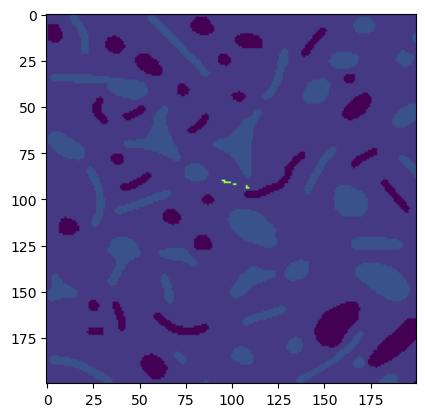

In [115]:
with open('settings.json', 'r') as f:
  settings = json.load(f)

grid = np.load('real_world.npy')
grid = np.zeros(shape=grid.shape)
M, count_down = start_fire_grid(grid, p=0.00001)                    # Generate a grid

if settings['varying_densities'] == True:
    # We provide 4 different densities with varying burn and growth rates.
    species = np.load('real_world.npy') * 4
    burning_time = settings['burn_time']
    growing_time = settings['grow_time']
else:
    species = np.zeros(shape=M.shape)

if settings['rain'] == True:
    rain = generate_rain(shape=M.shape)
else:
    rain = np.zeros(shape=M.shape)


M = M + species/4

M = np.load('real_world.npy')
count_down = np.zeros(shape=M.shape)
# Fix any artifacting from adding varying densities to our grid.
M[M < 0] = -1


M[90, 95:97] = 3
count_down[90, 95:97] = 2

M[91, 96:100] = 3
count_down[91, 96:100] = 2

M[92, 101] = 3
count_down[92, 101] = 2

M[92, 102] = 3
count_down[92, 102] = 2

M[93, 108] = 3
count_down[93, 108] = 2

M[94, 109] = 3
count_down[94, 109] = 2

M[94, 108] = 3
count_down[94, 108] = 2


plt.imshow(M)
plt.show()

In [116]:
steps = 150

wind_directions = []
for i in range(steps):
    if i < steps//2:
        wind_directions.append([-10, -10])
    else:
        wind_directions.append([10, 10])

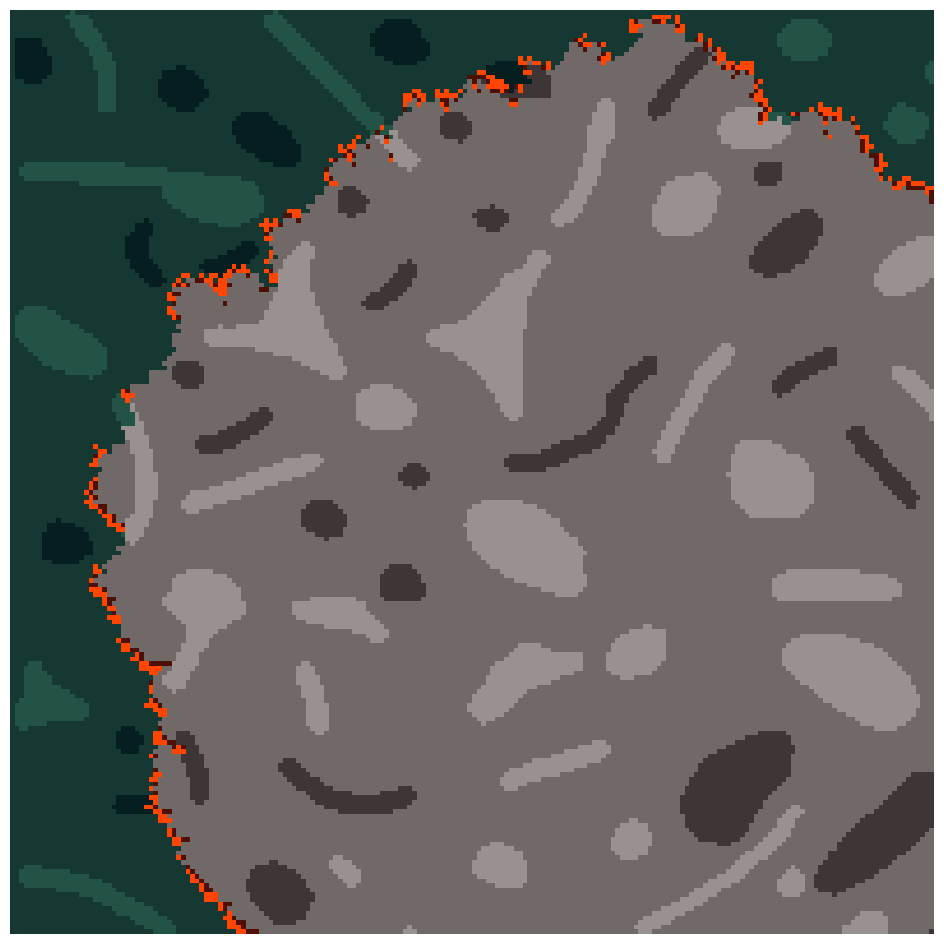

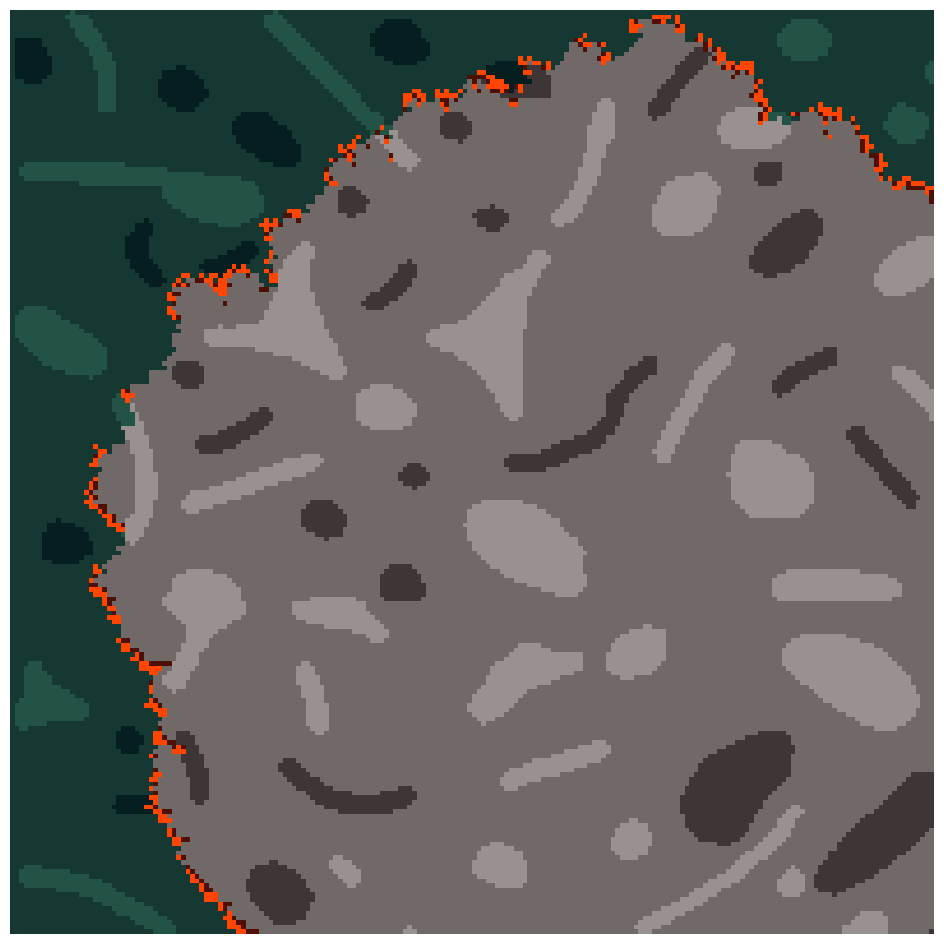

In [117]:

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 12))
ax.axis('off')

M_tracked = np.zeros(shape=(steps, M.shape[0], M.shape[1]))

for i in range(steps):
    print(f"On step {i}")
    
    # Update M and count_down with your logic
    M, count_down = update(
        M=M,
        count_down=count_down,
        species=species,
        rain=rain,
        burning_time=burning_time,
        growing_time=growing_time,
        wind_dir=wind_directions[i]
    )
    
    M_tracked[i] = M
    # Clear previous output and display the updated plot
    clear_output(wait=True)
    ax.clear()
    ax.axis('off')
    ax.imshow(M, cmap=cmap, norm=norm)
    display(fig)

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x000001DF3F8A0360>
KeyError: 'changed'
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x000001DF360EAD40>
KeyError: 'changed'
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x000001DF3794CD60>
KeyError: 'changed'


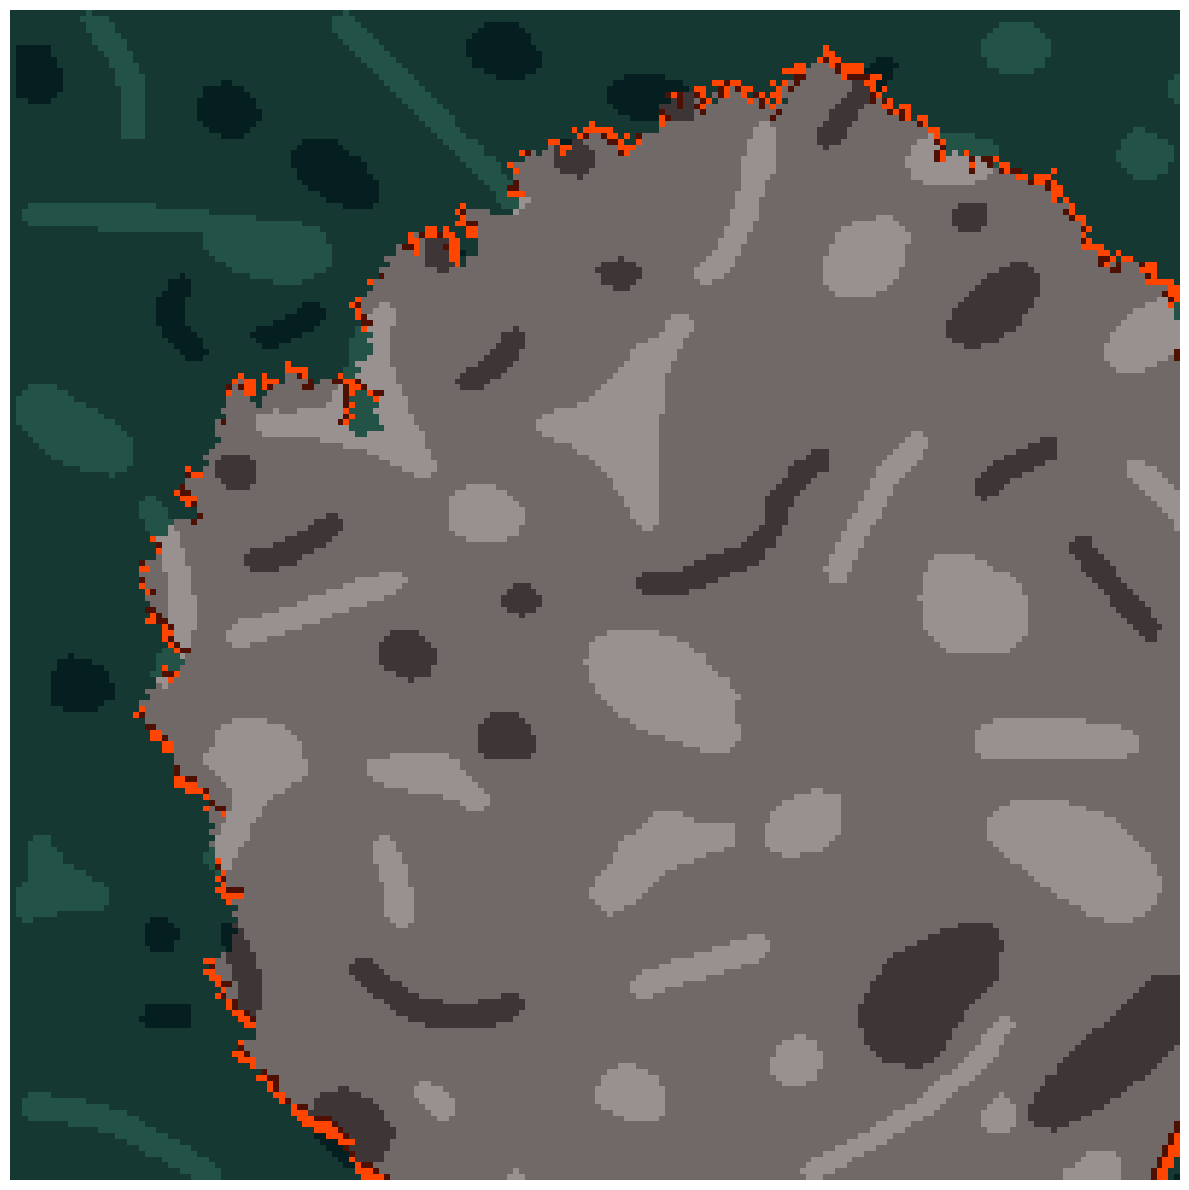

In [126]:
plt.figure(figsize=(12, 12))
plt.imshow(M_tracked[139], cmap=cmap, norm=norm)
plt.axis('off')
plt.tight_layout()
plt.show()